# ENUNCIADO

O projeto deve ser feito em grupo 5 ou 6 e será apresentado dia 24/01.
Pode ser apresentado por um ou dois membro(s) da equipe.
Tempo aproximado 10 a 20 min.

Como o projeto será avaliado, o notebook deve conter:
1) Criar uma lista de dicas/técnicas que aprenderam neste módulo que foram usadas no projeto

2) Indicar dentro do notebook cada item da lista (vide exemplo abaixo)

3) Estar publicado no Github

4) Você está apresentando as conclusões dos dados, pense com a cabeça de negócio, ex:

Qual a média de idade dos clientes que mais compraram?
Quantos porcento dos clientes que mais compraram, são os de maior ticket?
Quais os dias da semana os clientes mais compram?
Qual o percentual de crianças e adultos dentro nossos clientes?
Não queremos explicações de como funciona o código, queremos perguntas e respostas de negócio.

Esses quatro itens são obrigatórios, caso contrário não serão aceitos.

01) Leitura de arquivo com dados
02) Preenchimento valores faltantes
03) Normalização
04) Transformação de Categórico para Numérico
05) Tratamento de Datas
06) Demonstração tipos de dados
07) Quantidade de linhas de colunas
08) Mesclagem de Data Frames
09) Eliminar linhas duplicadas
10) Redefinição de indice
11) Agrupamento
12) Criar novas colunas (pode tentar)
13) Aplicar funções e lambdas
14) Encontrar maior/menores valores
15) Separar os top 1%
16) Manipulação de datas
17) Visualização de dados utilizando Matplotlib

Item 16) Manipulação de datas

Pergunta: Quais são os dias da semana... ?

datetime....

Requisitos para a escolha da base de dados:

Esteja em 2 arquivos
Não esteja completo
Tenha dados categóricos(qualitativos) e numéricos(quantitativos)
Tenha datas
Quantidade de campos grande (facilita pensar em perguntas de negócio para responder)

Dataset selecionado:
https://www.kaggle.com/code/melikedilekci/supermarket-sales-eda/notebook

# TAREFAS 20/01/2024 23:12

- Verificar se é possível exportar de alguma maneira o notebook para pdf.
  (fpdf ou pytofdp, LATEX ou pdfkit) (Ultima prioridade, somente um PLUS).
- Acrescentar perguntas de Negócios para a lista de perguntas (meta = 30). 
- Númerar e organizar as perguntas de negócio no código
- Ajustar as cores de todos os graficos para manter um padrão
- Organizar a ordem das perguntas e montar um roteiro de apresentação.
**- Trocar a o grafico de top3 produtos mais/menos vendidos de quantidade de vendas por volume de faturamento.

## PERGUNTAS DE NEGÓCIO (META 30)

Perguntas:

1) ~~Ticket Médio~~

2) ~~Periodo do mês com maior volume de compras.~~

3) ~~Qual tipo de genero consome cada tipo dos produtos disponiveis~~

**4) ~~Qual a categoria (top3) das categorias de produtos mais vendidas.~~

**5) ~~Qual a categoria (top3) das categorias de produtos menos vendidas, e como podemos impulsionar suas vendas?.~~

6) ~~Meio de pagamento x membership (Como conseguir mais membros cadastrados)~~

7) ~~Quantidade de Membros x Fidelização.~~

8) ~~Wordcloud~~

9) Qual o horario de pico. (Dimensionar quantidade de vendedores e caixas disponiveis para suprir picos de visitas, se existirem).(*feriados, sábado, domingo).

10) Qual dia do mês mais vende (*feriados, sábado, domingo)

11) Qual horario favorito dos homens/mulheres. 

12) Horario em que mais se vende cada categoria de produto. x horario

13) Ticket médio por horario

14) Horarios mais lucrativos

15) Ticket médio por genero.

16) Média de avaliações

17) Dentro de um numero x de vendas no mes, quantas foram para afiliados?

18)  Como o tipo de cliente (Member/Normal) influencia no ticket médio de compra?

19) Como o método de pagamento impacta na taxa de conversão de vendas?

20) Qual é a média de avaliação dos produtos e como ela se relaciona com as vendas?

21) Como a localização geográfica das filiais influencia nas preferências de produtos?

22) Qual é a relação entre o horário de compra e a quantidade de produtos adquiridos?

23) Como a participação em programas de fidelidade impacta nas decisões de compra?

24) Qual é o gênero predominante entre os clientes?

25) Qual é a linha de produto mais popular?

26) Qual é a classificação média dos clientes?

27) Qual é o total de vendas médio por transação?

28) Qual é a cidade com o maior número de vendas?

29)

30)


# Início do Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
%matplotlib inline

In [3]:
df_importacao_completo = pd.read_csv('supermarket_sales.csv')

### 00) Dividir dataset

In [4]:
metade = len(df_importacao_completo) // 2

In [5]:
df_importacao_parte1 = df_importacao_completo.iloc[:metade, :]
df_importacao_parte2 = df_importacao_completo.iloc[metade:, :]

In [6]:
df_importacao_parte1.to_csv('supermarket_sales_1.csv', index=False)
df_importacao_parte2.to_csv('supermarket_sales_2.csv', index=False)

### 01) Leitura de arquivo com dados

In [7]:
df_parte1 = pd.read_csv('supermarket_sales_1.csv')
df_parte2 = pd.read_csv('supermarket_sales_1.csv')

In [8]:
df = pd.concat([df_parte1, df_parte2], ignore_index=True)

In [9]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
colunas_para_remover = ['Invoice ID', 'cogs', 'gross margin percentage', 'gross income']

In [12]:
df = df.drop(colunas_para_remover, axis=1)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,B,Mandalay,Normal,Male,Sports and travel,75.92,8,30.3680,637.7280,3/20/2019,14:14,Cash,5.5
996,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,1/1/2019,15:51,Cash,8.5
997,C,Naypyitaw,Normal,Female,Food and beverages,90.24,6,27.0720,568.5120,1/27/2019,11:17,Cash,6.2
998,B,Mandalay,Member,Female,Sports and travel,98.13,1,4.9065,103.0365,1/21/2019,17:36,Cash,8.9


### 05) Tratamento de Datas

In [13]:
tipos_de_dados = df.dtypes
print(tipos_de_dados)

Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Date              object
Time              object
Payment           object
Rating           float64
dtype: object


In [14]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

In [15]:
df.dtypes

Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
Rating                  float64
dtype: object

### 06) Demonstração tipos de dados

In [16]:
tipos_de_dados = df.dtypes
display(tipos_de_dados)

Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
Rating                  float64
dtype: object

### 07) Quantidade de linhas e colunas

In [17]:
num_linhas, num_colunas = df.shape
print(f'Número de linhas: {num_linhas}, Número de colunas: {num_colunas}')

Número de linhas: 1000, Número de colunas: 13


### 08) Mesclagem de DataFrames

### 09) Eliminar linhas duplicadas

In [18]:
dados_sem_duplicatas = df.drop_duplicates()

### 10) Redefinição de índice

In [19]:
dados_sem_duplicatas = dados_sem_duplicatas.reset_index(drop=True)

In [20]:
dados_sem_duplicatas

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,B,Mandalay,Normal,Male,Sports and travel,75.92,8,30.3680,637.7280,2019-03-20,1900-01-01 14:14:00,Cash,5.5
496,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,2019-01-01,1900-01-01 15:51:00,Cash,8.5
497,C,Naypyitaw,Normal,Female,Food and beverages,90.24,6,27.0720,568.5120,2019-01-27,1900-01-01 11:17:00,Cash,6.2
498,B,Mandalay,Member,Female,Sports and travel,98.13,1,4.9065,103.0365,2019-01-21,1900-01-01 17:36:00,Cash,8.9


### 11) Agrupamento

In [21]:
vendas_mensais = df.groupby('Product line')['Total'].sum()
vendas_mensais.sort_values(ascending=False)

Product line
Sports and travel         60156.369
Home and lifestyle        56974.050
Food and beverages        56655.837
Fashion accessories       55755.630
Electronic accessories    50956.185
Health and beauty         49497.630
Name: Total, dtype: float64

### 12) Criar novas colunas

In [22]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

In [23]:
tipos_de_dados = df.dtypes
display(tipos_de_dados)

Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
Rating                  float64
Month                     int32
Day                       int32
Year                      int32
dtype: object

### 13) Aplicar funções e lambdas

Aplicando uma função lambda para um hipótese de merge com um dataset que avalia de 1 a 5

In [24]:
df['Rating 2.0'] = df['Rating'].apply(lambda x: x / 2)

In [25]:
display(df['Rating 2.0'])

0      4.55
1      4.80
2      3.70
3      4.20
4      2.65
       ... 
995    2.75
996    4.25
997    3.10
998    4.45
999    4.80
Name: Rating 2.0, Length: 1000, dtype: float64

### 14) Encontrar maior/menor valores

In [26]:
melhor_avaliacao = df['Rating'].max()
pior_avaliacao = df['Rating'].min()

In [27]:
melhor_avaliacao

10.0

In [28]:
pior_avaliacao

4.0

### 15) Separar os top 1%

In [29]:
top_1_percento = df.nlargest(int(0.01 * len(df)), 'Unit price')

In [30]:
top_1_percento

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,Month,Day,Year,Rating 2.0
122,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,2019-03-09,1900-01-01 17:26:00,Credit card,4.2,3,9,2019,2.10
622,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.982,944.622,2019-03-09,1900-01-01 17:26:00,Credit card,4.2,3,9,2019,2.10
494,B,Mandalay,Normal,Male,Fashion accessories,99.89,2,9.989,209.769,2019-02-26,1900-01-01 11:48:00,Ewallet,7.1,2,26,2019,3.55
994,B,Mandalay,Normal,Male,Fashion accessories,99.89,2,9.989,209.769,2019-02-26,1900-01-01 11:48:00,Ewallet,7.1,2,26,2019,3.55
283,A,Yangon,Member,Male,Health and beauty,99.83,6,29.949,628.929,2019-03-04,1900-01-01 15:02:00,Ewallet,8.5,3,4,2019,4.25
783,A,Yangon,Member,Male,Health and beauty,99.83,6,29.949,628.929,2019-03-04,1900-01-01 15:02:00,Ewallet,8.5,3,4,2019,4.25
300,C,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.982,209.622,2019-01-02,1900-01-01 18:09:00,Credit card,6.7,1,2,2019,3.35
800,C,Naypyitaw,Normal,Male,Fashion accessories,99.82,2,9.982,209.622,2019-01-02,1900-01-01 18:09:00,Credit card,6.7,1,2,2019,3.35
362,C,Naypyitaw,Normal,Male,Food and beverages,99.79,2,9.979,209.559,2019-03-07,1900-01-01 20:37:00,Ewallet,8.0,3,7,2019,4.00
862,C,Naypyitaw,Normal,Male,Food and beverages,99.79,2,9.979,209.559,2019-03-07,1900-01-01 20:37:00,Ewallet,8.0,3,7,2019,4.00


### 16) Manipulação de datas

In [31]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

### 17) Visualização de dados utilizando Matplotlib

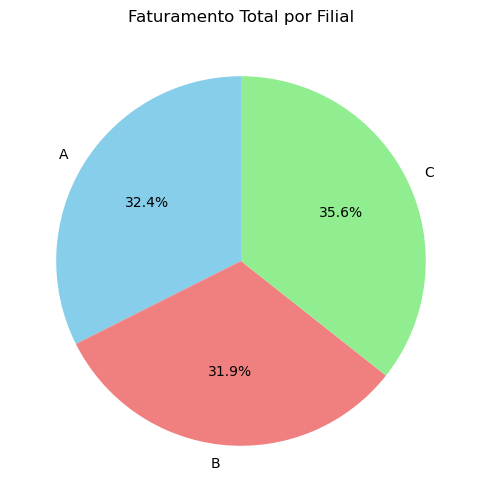

In [32]:
faturamento_por_filial = df.groupby('Branch')['Total'].sum()

plt.figure(figsize=(6, 6))
plt.pie(faturamento_por_filial, labels=faturamento_por_filial.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Faturamento Total por Filial')
plt.show()

# Perguntas de negócio

#### Pergunta: Qual a relação entre os afiliados e os não afiliados?

In [33]:
df_membros = df['Customer type'].value_counts()

In [34]:
df_membros

Customer type
Normal    518
Member    482
Name: count, dtype: int64

In [35]:
membros_afiliados = df.loc[df['Customer type'] == 'Member']
membros_normais = df.loc[df['Customer type'] == 'Normal']

In [36]:
membros_normais['Customer type']

1      Normal
2      Normal
4      Normal
5      Normal
7      Normal
        ...  
990    Normal
994    Normal
995    Normal
996    Normal
997    Normal
Name: Customer type, Length: 518, dtype: object

In [37]:
 df_membros['Member']

482

plt.bar(df_membros.index, df_membros['Customer type'], color=['pink', 'blue'])

ax = plt.gca()

for i, v in enumerate(ticket_label):
    ax.text(i, int(v) + 0.03, round(v, 2), ha='center', va='bottom')


plt.xlabel('Gênero')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio por Gênero')

plt.rcParams['figure.figsize'] = (9,9)
plt.show()

## Ticket Médio

In [38]:
df['Total'].mean()

329.995701

In [39]:
ticket_medio_genero = df.groupby('Gender').agg({'Total': 'sum', 'Quantity': 'count'})

ticket_medio_genero.rename(columns={'Total': 'Montante', 'Quantity': 'No. Compras'}, inplace=True)

ticket_medio_genero['Ticket Médio'] = ticket_medio_genero['Montante'] / ticket_medio_genero['No. Compras']

print(ticket_medio_genero[['Montante', 'No. Compras', 'Ticket Médio']])

          Montante  No. Compras  Ticket Médio
Gender                                       
Female  169654.611          492    344.826445
Male    160341.090          508    315.632067


In [40]:
ticket_label = ticket_medio_genero['Ticket Médio']

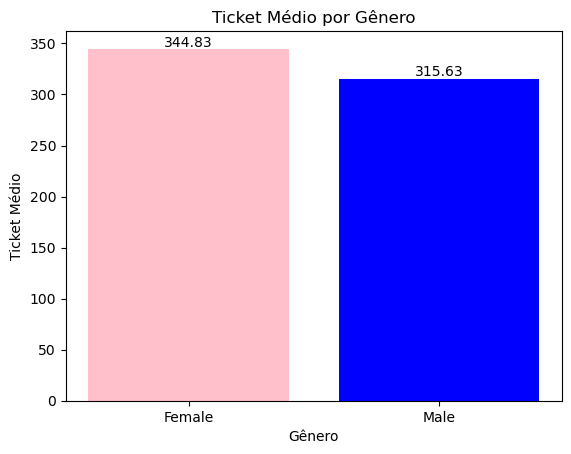

In [41]:
plt.bar(ticket_medio_genero.index, ticket_medio_genero['Ticket Médio'], color=['pink', 'blue'])

ax = plt.gca()

for i, v in enumerate(ticket_label):
    ax.text(i, int(v) + 0.03, round(v, 2), ha='center', va='bottom')


plt.xlabel('Gênero')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio por Gênero')

plt.rcParams['figure.figsize'] = (9,9)
plt.show()

## Top3 das categorias de produtos mais vendidas

In [42]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'Rating', 'Month', 'Day', 'Year', 'Rating 2.0'],
      dtype='object')

In [66]:
produtos_mais_vendidos = df.groupby('Product line')['Total'].sum()
produtos_mais_vendidos

Product line
Electronic accessories    50956.185
Fashion accessories       55755.630
Food and beverages        56655.837
Health and beauty         49497.630
Home and lifestyle        56974.050
Sports and travel         60156.369
Name: Total, dtype: float64

In [67]:
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)
top3_mais_vendidos

Product line
Sports and travel     60156.369
Home and lifestyle    56974.050
Food and beverages    56655.837
Name: Total, dtype: float64

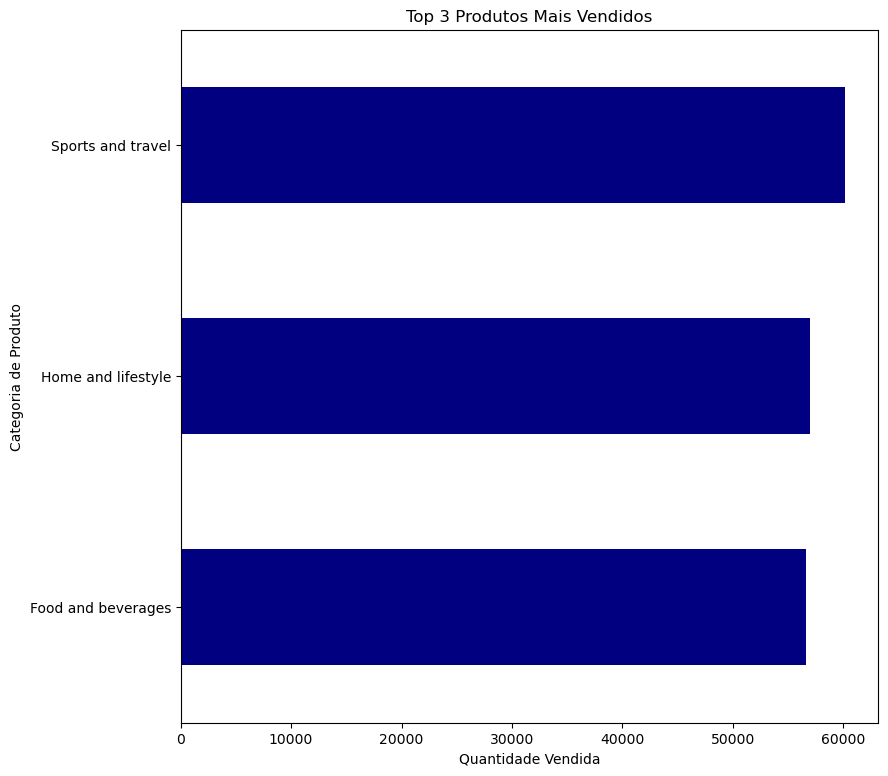

In [68]:
produtos_mais_vendidos = df.groupby('Product line')['Total'].sum()
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)

fig, ax = plt.subplots()
top3_mais_vendidos.sort_values().plot(kind='barh', color='navy')
ax.set_xlabel('Quantidade Vendida')
ax.set_ylabel('Categoria de Produto')
ax.set_title('Top 3 Produtos Mais Vendidos')

plt.show()

## Top3 das categorias de produtos menos vendidas

In [69]:
produtos_menos_vendidos = df.groupby('Product line')['Total'].sum()
produtos_menos_vendidos

Product line
Electronic accessories    50956.185
Fashion accessories       55755.630
Food and beverages        56655.837
Health and beauty         49497.630
Home and lifestyle        56974.050
Sports and travel         60156.369
Name: Total, dtype: float64

In [70]:
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)
top3_menos_vendidos

Product line
Health and beauty         49497.630
Electronic accessories    50956.185
Fashion accessories       55755.630
Name: Total, dtype: float64

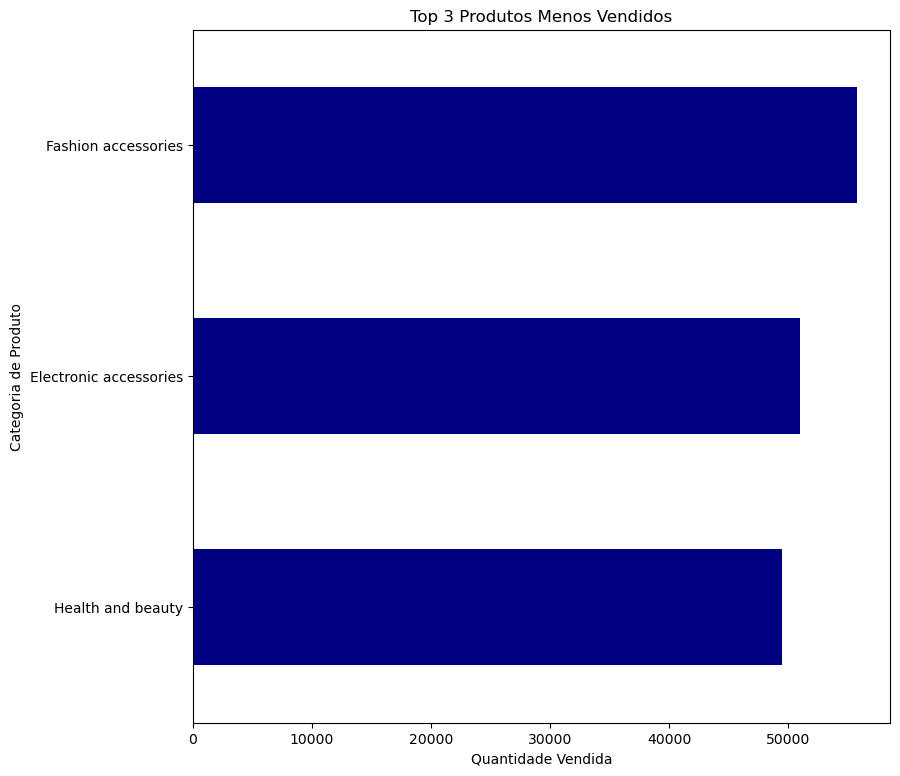

In [71]:
produtos_menos_vendidos = df.groupby('Product line')['Total'].sum()
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)

fig, ax = plt.subplots()
top3_menos_vendidos.plot(kind='barh', color='navy')
ax.set_xlabel('Quantidade Vendida')
ax.set_ylabel('Categoria de Produto')
ax.set_title('Top 3 Produtos Menos Vendidos')

plt.show()

## Word Cloud

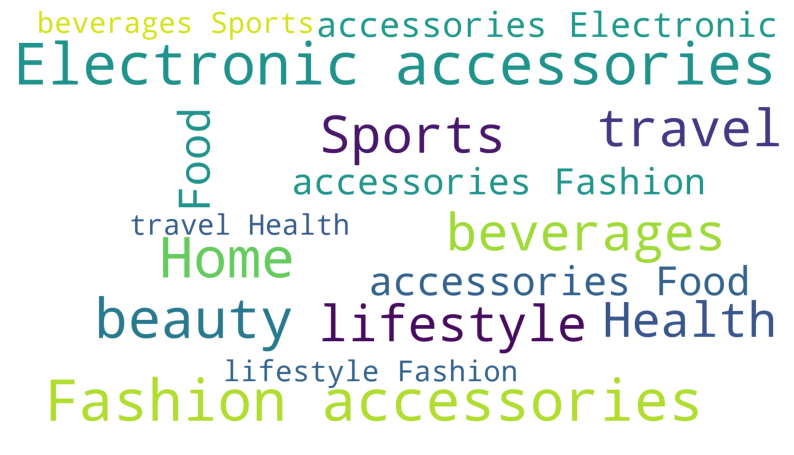

In [49]:
plt.subplots(figsize=(10,9))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Compras por gênero

In [50]:
filtro_mulher = df[df['Gender'] == 'Female']
filtro_homem = df[df['Gender'] == 'Male']

In [51]:
transacoes_homem = filtro_homem['Product line'].value_counts()
transacoes_mulher= filtro_mulher['Product line'].value_counts()

In [52]:
transacoes_homem

Product line
Home and lifestyle        92
Food and beverages        86
Sports and travel         84
Electronic accessories    84
Health and beauty         82
Fashion accessories       80
Name: count, dtype: int64

In [53]:
transacoes_mulher

Product line
Fashion accessories       90
Electronic accessories    88
Food and beverages        86
Sports and travel         86
Health and beauty         72
Home and lifestyle        70
Name: count, dtype: int64

In [54]:
produtos = df['Product line'].unique()
produtos

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [55]:
transacoes_homem = transacoes_homem.reindex(produtos, fill_value=0)
transacoes_mulher = transacoes_mulher.reindex(produtos, fill_value=0)
index = np.arange(len(produtos))
index

array([0, 1, 2, 3, 4, 5])

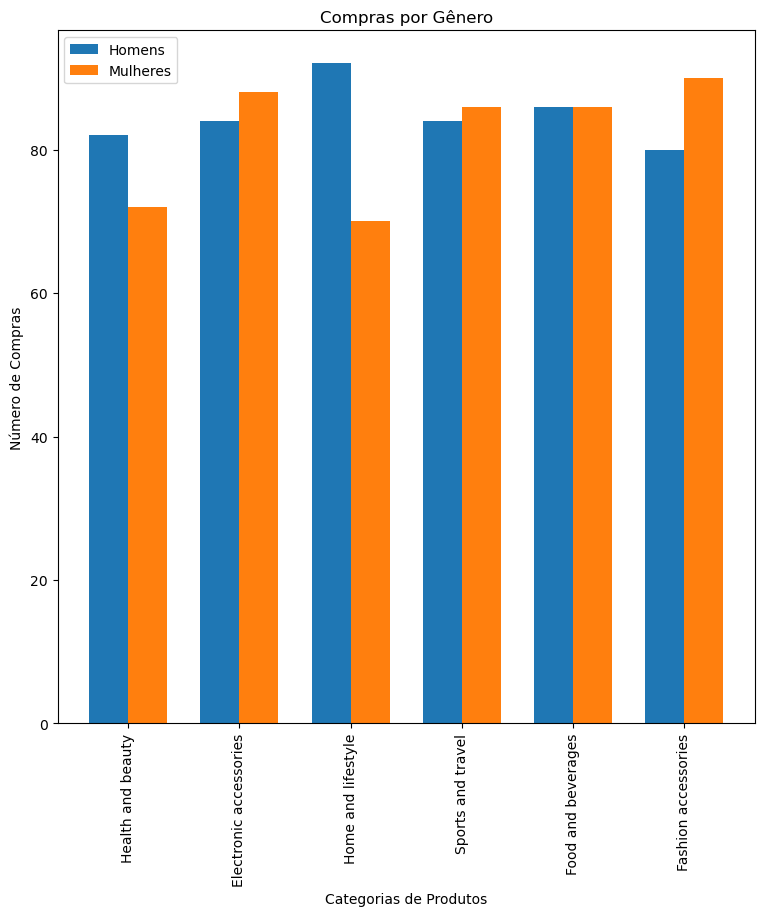

In [56]:
index = np.arange(len(produtos))
index

fig, ax = plt.subplots()
bar_width = 0.35


barra_homem = ax.bar(index, transacoes_homem, bar_width, label='Homens')
barra_mulher = ax.bar(index + bar_width, transacoes_mulher, bar_width, label='Mulheres')

ax.set_xlabel('Categorias de Produtos')
ax.set_ylabel('Número de Compras')
ax.set_title('Compras por Gênero')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(produtos, minor=False, rotation=90)
ax.legend()

plt.show()

## Meios de pagamento x afiliação

In [57]:
pagamento_total = df['Total'].sum()
pagamento_total

329995.701

In [58]:
pagamentos_membros = df.loc[df['Customer type'].isin(['Member']), ['Payment', 'Total']]
pagamentos_membros

,Payment,Total
0,Ewallet,548.9715
3,Ewallet,489.0480
6,Ewallet,433.6920
8,Credit card,76.1460
9,Credit card,172.7460
...,...,...
991,Credit card,206.4300
992,Ewallet,212.6880
993,Credit card,127.2600
998,Cash,103.0365


In [59]:
pagamentos_nao_membros = df.loc[df['Customer type'].isin(['Normal']), ['Payment', 'Total']]
pagamentos_nao_membros

,Payment,Total
1,Cash,80.2200
2,Credit card,340.5255
4,Ewallet,634.3785
5,Ewallet,627.6165
7,Ewallet,772.3800
...,...,...
990,Ewallet,72.8700
994,Ewallet,209.7690
995,Cash,637.7280
996,Cash,132.7620


In [60]:
meios_pagamentos = df['Payment'].unique()
meios_pagamentos

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [61]:
total_pagamentos_membros = pagamentos_membros.groupby('Payment')['Total'].sum()
total_pagamentos_membros

Payment
Cash           57493.254
Credit card    59191.587
Ewallet        48030.045
Name: Total, dtype: float64

In [62]:
total_pagamentos_nao_membros = pagamentos_nao_membros.groupby('Payment')['Total'].sum()
total_pagamentos_nao_membros

Payment
Cash           64925.070
Credit card    41029.821
Ewallet        59325.924
Name: Total, dtype: float64

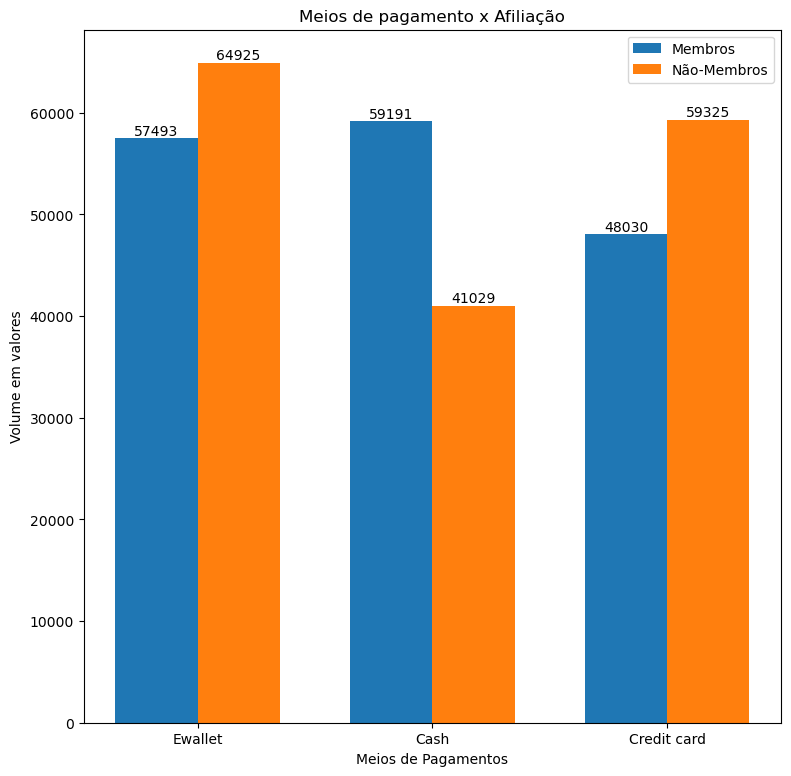

In [63]:
index = np.arange(len(meios_pagamentos))
index

fig, ax = plt.subplots()
bar_width = 0.35


barra_membros = ax.bar(index, total_pagamentos_membros, bar_width, label='Membros')
barra_nao_membros = ax.bar(index + bar_width, total_pagamentos_nao_membros, bar_width, label='Não-Membros')

ax.set_xlabel('Meios de Pagamentos')
ax.set_ylabel('Volume em valores')
ax.set_title('Meios de pagamento x Afiliação')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(meios_pagamentos)
ax.legend()

for i, v in enumerate(total_pagamentos_membros):
    ax.text(i, v + 0.02, int(v), ha='center', va='bottom')

for i, v in enumerate(total_pagamentos_nao_membros):
    ax.text(i + bar_width, int(v) + 0.02, int(v), ha='center', va='bottom')


plt.rcParams['figure.figsize'] = (9,9)
plt.show()

## Mês e dias do mês com maior volume de compras


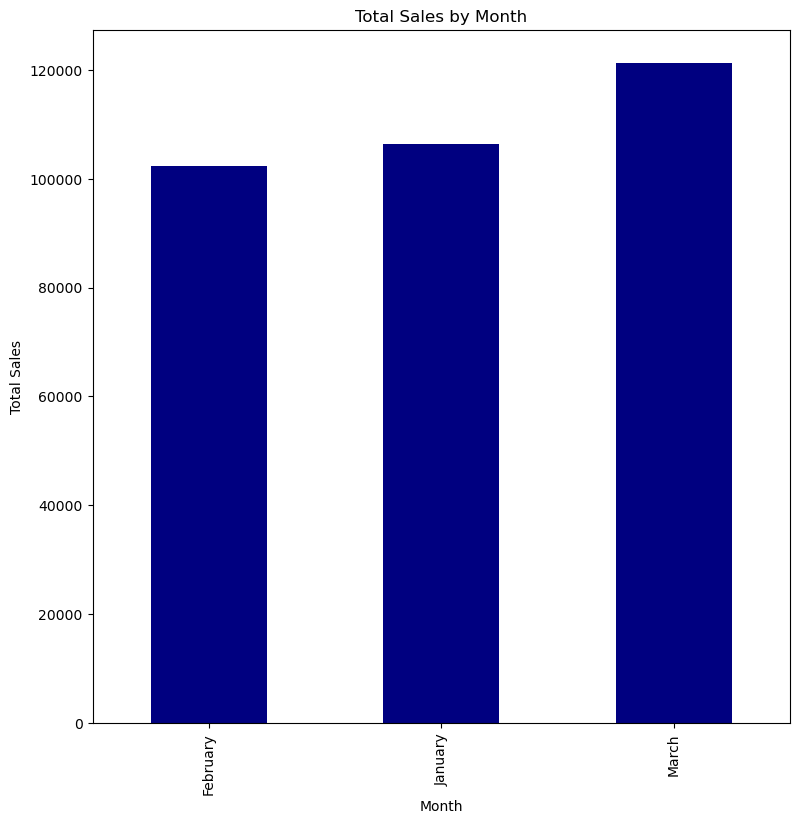

In [64]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Month'] = df['Date'].dt.month_name()  


vendas_mensais = df.groupby('Month')['Total'].sum()


fig, ax = plt.subplots()
vendas_mensais.plot(kind='bar', color='navy')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month')

plt.show()

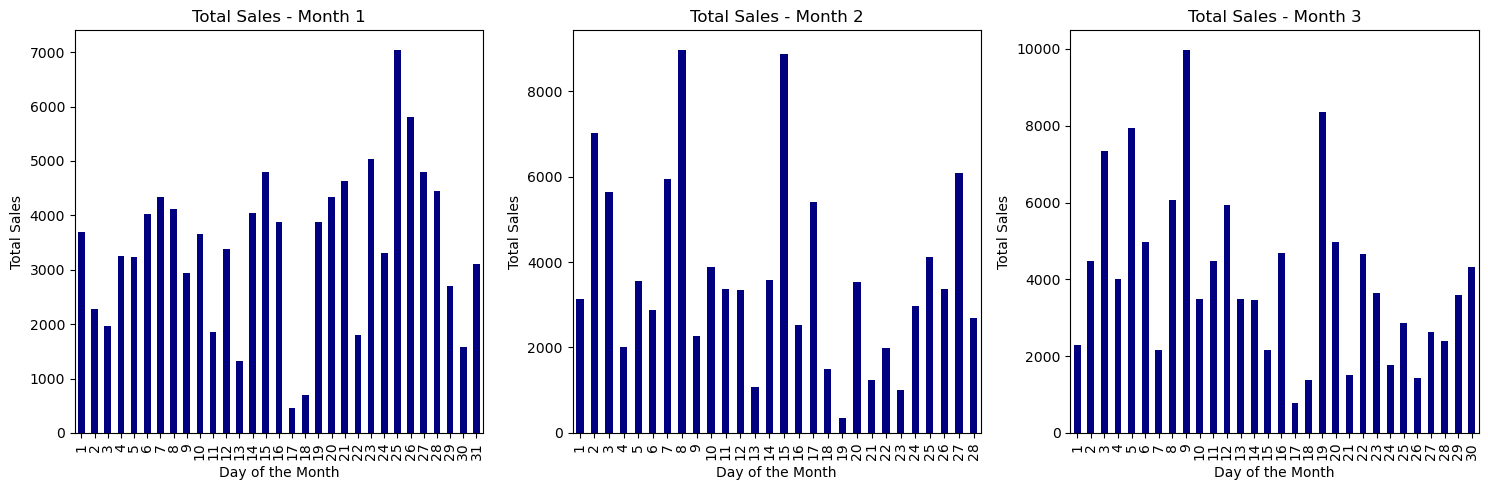

In [65]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for month, ax in zip(range(1, 4), axes):
    dia_mes = df[df['Month'] == month]
    vendas_diarias = dia_mes.groupby('Day')['Total'].sum()    
    
    vendas_diarias.plot(kind='bar', color='navy', ax=ax)
    ax.set_title(f'Total Sales - Month {month}')
    ax.set_xlabel('Day of the Month')
    ax.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()